In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img, img_to_array

In [97]:
import os

img_dir = r'C:\Users\eweli\Pictures\train'
images = os.listdir(img_dir)

In [98]:
full_images = [os.path.join(img_dir, img) for img in images]

In [99]:
from imports_for_ML import load_images
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [100]:
X, y = load_images(img_dir, n_images=25000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
*******************************

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [102]:
from keras.layers import Dropout, BatchNormalization

In [103]:
model = Sequential()

model.add(Conv2D(16, (4, 4), input_shape=(50, 50, 3), activation='relu'))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))


model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 47, 47, 16)        784       
_________________________________________________________________
batch_normalization_3 (Batch (None, 47, 47, 16)        64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
__________

In [109]:
from keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience= 5)

In [114]:
stop_early = EarlyStopping(patience=5)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.04, callbacks=[stop_early])

Train on 19200 samples, validate on 800 samples
Epoch 1/15
19200/19200 [==============================] - 55s 3ms/step - loss: 0.1043 - acc: 0.9590 - val_loss: 0.7065 - val_acc: 0.8113
Epoch 2/15
19200/19200 [==============================] - 57s 3ms/step - loss: 0.1063 - acc: 0.9578 - val_loss: 0.6665 - val_acc: 0.8187
Epoch 3/15
19200/19200 [==============================] - 58s 3ms/step - loss: 0.0880 - acc: 0.9660 - val_loss: 0.6271 - val_acc: 0.8325
Epoch 4/15
19200/19200 [==============================] - 56s 3ms/step - loss: 0.0897 - acc: 0.9652 - val_loss: 0.7822 - val_acc: 0.8237
Epoch 5/15
19200/19200 [==============================] - 54s 3ms/step - loss: 0.0913 - acc: 0.9648 - val_loss: 0.6377 - val_acc: 0.8200
Epoch 6/15
19200/19200 [==============================] - 54s 3ms/step - loss: 0.0830 - acc: 0.9690 - val_loss: 0.7635 - val_acc: 0.8113
Epoch 7/15
19200/19200 [==============================] - 53s 3ms/step - loss: 0.0837 - acc: 0.9693 - val_loss: 0.6247 - val_acc: 

In [1]:
plt.plot(history.history['loss'], 'bo', label = 'Training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.legend()

NameError: name 'plt' is not defined

In [115]:
train_corr = model.evaluate(X_train, y_train)[1]
print('Accuracy on the training data:')
print(train_corr)

test_corr = model.evaluate(X_test, y_test)[1]
print('\nAccuracy on the test data:')
print(test_corr)

20000/20000 [==============================] - 25s 1ms/step
Accuracy on the training data:
0.97145
5000/5000 [==============================] - 6s 1ms/step

Accuracy on the test data:
0.8194


In [124]:
loss = history.history['loss']
print(loss)

[0.10429024050322672, 0.10630083927263816, 0.08804407226154581, 0.0897006603050977, 0.09133851156259576, 0.08296804626481996, 0.08373518388446731, 0.07401057492170367, 0.07885463083318124, 0.07184142503111313, 0.07126270833522237, 0.0737130196338209]


In [151]:
index = range(1,25000)
index

range(1, 25000)

In [152]:
test_sample = X_test[:25000]
predictions = model.predict(test_sample)
true_labels = y_test[:25000]

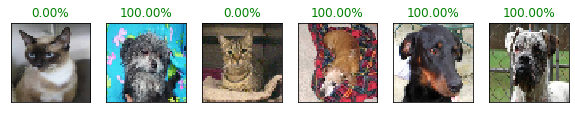

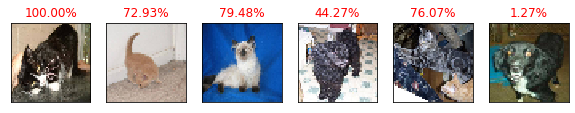

In [184]:
fig, ax = plt.subplots(ncols=6, figsize=(10, 6))
k = 0
for i in range(29,36):
    
    idx = i
    correct_response = true_labels[idx]
    it_is_really = ['cat', 'dog'][correct_response]
    net_claims = predictions[idx, 0]
    is_net_correct = np.abs(net_claims - correct_response) < 0.5 
    if is_net_correct == True:
       
        ax[k].imshow(test_sample[idx] / 255)       
        ax[k].set_title('{:.2f}%'.format(net_claims*100), color = 'green')
        ax[k].set_xticks([])
        ax[k].set_yticks([])
        k = k+1
        print
        
fig, ax = plt.subplots(ncols=6, figsize=(10, 6))
k = 0
for a in range(37):
    
    idx2 = a
    correct_response = true_labels[idx2]
    it_is_really = ['cat', 'dog'][correct_response]
    net_claims = predictions[idx2, 0]
    is_net_correct = np.abs(net_claims - correct_response) < 0.5 
    if is_net_correct == False:
        ax[k].imshow(test_sample[idx2] / 255)       
        ax[k].set_title('{:.2f}%'.format(net_claims*100), color = 'red')
        ax[k].set_xticks([])
        ax[k].set_yticks([])
        k = k+1
        print
    

In [185]:
model.save('Ewelina_Mohammad_38668_MODEL.h5')